数据来源：http://insideairbnb.com/ #Shanghai
截取日期：June 21, 2022

Step 0: 导入库

In [86]:
#数据框架
import numpy as np
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
pd.set_option('display.max_columns', None)

#图像化
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sb
%matplotlib inline
from pandas_profiling import ProfileReport

#文字分析
import jieba
from wordcloud import WordCloud,STOPWORDS

Step 1：数据清理和概述

In [15]:
review = pd.read_csv('reviews.csv', parse_dates= [2])
review['listing_id'] = np.array(review['listing_id'])
review['id'] = np.array(review['id'])
review['reviewer_id'] = np.array(review['reviewer_id'])

In [17]:
review.shape

(333707, 6)

In [63]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,24963,105158,2010-09-26,125515,Lucia,Even though the actual apt listed was not read...
1,24963,191610,2011-03-03,311924,Marty,Jia's place is in a vibrant and (in my opinion...
2,24963,347084,2011-07-02,23521,Thomas,The host canceled my reservation the day befor...
3,24963,384765,2011-07-20,491296,Nikko,JIa and her apt was great! It was easy to fin...
4,24963,406458,2011-07-30,228345,Deborah And Andrew,"Clean, spacious apartment in a lovely neighbor..."


In [20]:
review.nunique()

listing_id        17231
id               333707
date               2928
reviewer_id      279651
reviewer_name    114312
comments         306640
dtype: int64

In [70]:
listings = pd.read_csv('listings.csv', encoding_errors= 'ignore',encoding='utf-8')
listings.set_index('id', inplace= True)

In [21]:
listings.shape

(28363, 64)

In [40]:
listings.head()

,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5373202,"【HIP】Studio Former Fr Concession, 5 mins to su...",*We're committed to your safety & have impleme...,This apartment is only five minutes walk from ...,17743161,Shanghai,2014-07-07,"Singapore, Singapore","Hi, We're Faye & Sarah! Our apartments are sit...",within a day,90%,98%,t,Xintiandi,24.0,24.0,"['email', 'phone']",t,t,"Shanghai, China",徐汇区 / Xuhui District,31.204670,121.450140,Entire condo,Entire home/apt,2,1 bath,1.0,1.0,"[""Heating"", ""34\"" TV with standard cable"", ""Di...",442.0,21,365,21,21,1125,1125,21.0,1125.0,t,30,37,37,37,272,0,0,2015-02-24,2020-01-06,4.72,4.79,4.78,4.91,4.90,4.88,4.64,f,13,13,0,0,3.05
24963,Heart of French Built Music Conservatory / Home,The flat is located in the heart of formal Fre...,"It's Shanghai Music Concession adjacent, lots ...",98203,Jia,2010-03-24,"Shanghai, Shanghai, China","I am an architect, trained and studied in US, ...",NaN,NaN,NaN,f,Conservatory,2.0,2.0,"['email', 'phone']",t,t,"Shanghai, China",徐汇区 / Xuhui District,31.210730,121.451590,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Oven"", ""Heating"", ""Building staff"", ""Dishes ...",480.0,3,365,3,3,365,365,3.0,365.0,t,6,13,13,13,85,0,0,2010-09-26,2020-08-15,4.74,4.87,4.54,4.77,4.70,4.86,4.76,f,1,1,0,0,0.59
479517,有简约 绿色系 功能齐全 高楼层的绿色舒适7/13双轨交阳光暖窝公寓,绿色系的房间，化繁为简，通过房间简单的元素的搭配，合理的空间布局，全新的装修配置，塑造一个通...,"市中心,江宁路,靠近新会路,距离地铁站也很近。著名的玉佛寺就在一街之隔,大卖场,便利店,购物...",681552,Leon,2011-06-09,China,大家好，我是leon，老家浙江衢州，大学四年在北京，目前住在上海，江湖人称六哥(leon哥的...,within an hour,100%,100%,t,Putuo,4.0,4.0,"['email', 'phone']",t,t,"Shanghai, China",静安区 / Jing'an District,31.243059,121.443863,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Hair dryer"", ""Iron"", ""Bathroom essentials"", ...",458.0,3,1125,3,3,1125,1125,3.0,1125.0,t,16,23,23,23,84,9,0,2012-08-02,2022-02-12,4.89,4.86,4.68,4.88,4.95,4.87,4.78,t,4,4,0,0,0.70
479530,【sidihome】ROSE the big space apt in downtown,"[SidiHome, The Nordic style] The background of...","Central location, easy to get subway station l...",681552,Leon,2011-06-09,China,大家好，我是leon，老家浙江衢州，大学四年在北京，目前住在上海，江湖人称六哥(leon哥的...,within an hour,100%,100%,t,Putuo,4.0,4.0,"['email', 'phone']",t,t,"Shanghai, China",静安区 / Jing'an District,31.243710,121.445010,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Paid parking on premises"", ""Dishes and silve...",437.0,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,0,46,7,0,2012-08-25,2022-02-21,4.89,4.91,4.84,4.91,4.95,4.86,4.86,t,4,4,0,0,0.38
496972,Modern Stylish Master Bedroom near metro,Hello world! I'm very excited to welcome you t...,This beautiful and clean area in Shanghai is ...,2454164,Alvin,2012-05-24,China,I'm a Chinese guy living in Shanghai since 200...,within an hour,96%,72%,t,Quyang,5.0,5.0,"['email', 'phone']",t,t,"Shanghai, China",虹口区 / Hongkou District,31.276940,121.494710,Private 

In [42]:
listings.describe()

,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.836300e+04,28362.000000,28362.000000,28363.000000,28363.000000,28363.000000,27262.000000,28115.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,28363.000000,17231.00000,16712.000000,16712.000000,16710.000000,16712.000000,16709.000000,16709.000000,28363.000000,28363.000000,28363.000000,28363.000000,17231.000000
mean,2.321942e+08,24.059728,24.059728,31.202990,121.505905,3.790925,1.784792,2.303148,924.981032,6.941156,854.187145,6.857314,6.981772,921.995029,923.964143,6.915065,923.620312,16.898107,22.898741,22.898741,22.898741,11.765575,1.932800,0.010824,4.61739,4.826544,4.781170,4.858321,4.876505,4.832240,4.765897,17.966682,11.651941,6.120121,0.194549,0.604413
std,1.203885e+08,65.823582,65.823582,0.138793,0.174794,3.502969,1.933720,2.809736,2753.068549,33.148475,422.170012,32.972855,33.368956,378.778621,376.765310,33.117613,376.786643,13.188636,15.479615,15.479615,15.479615,28.959121,4.958362,0.136659,0.95707,0.450305,0.477676,0.419597,0.410505,0.397778,0.499138,31.802593,25.076485,14.516112,1.879661,0.820232
min,9.820300e+04,0.000000,0.000000,30.711090,120.858700,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.338486e+08,1.000000,1.000000,31.135979,121.429813,2.000000,1.000000,1.000000,257.000000,1.000000,365.000000,1.000000,1.000000,1125.000000,1125.000000,1.000000,1125.000000,2.000000,9.000000,9.000000,9.000000,0.000000,0.000000,0.000000,4.71000,4.850000,4.760000,4.890000,4.930000,4.830000,4.750000,3.000000,1.000000,0.000000,0.000000,0.110000
50%,2.358546e+08,6.000000,6.000000,31.196869,121.484810,2.000000,1.000000,1.000000,388.000000,1.000000,1125.000000,1.000000,1.000000,1125.000000,1125.000000,1.000000,1125.000000,23.000000,29.000000,29.000000,29.000000,1.000000,0.000000,0.000000,4.94000,5.000000,4.970000,5.000000,5.000000,5.000000,4.940000,9.000000,2.000000,1.000000,0.000000,0.280000
75%,3.423220e+08,17.000000,17.000000,31.234820,121.660308,4.000000,2.000000,2.000000,665.000000,1.000000,1125.000000,1.000000,1.000000,1125.000000,1125.000000,1.000000,1125.000000,30.000000,38.000000,38.000000,38.000000,9.000000,1.000000,0.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,18.000000,10.000000,8.000000,0.000000,0.750000
max,4.580070e+08,974.000000,974.000000,31.833680,121.941530,16.000000,50.000000,50.000000,150000.000000,1000.000000,1128.000000,1000.000000,1000.000000,1128.000000,1128.000000,1000.000000,1128.000000,30.000000,38.000000,38.000000,38.000000,453.000000,117.000000,7.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,236.000000,194.000000,138.000000,39.000000,9.140000


In [41]:
listings.nunique()

name                                            26939
description                                     22532
neighborhood_overview                           15587
host_id                                          7664
host_name                                        5662
host_since                                       2620
host_location                                     176
host_about                                       3803
host_response_time                                  4
host_response_rate                                 49
host_acceptance_rate                               68
host_is_superhost                                   2
host_neighbourhood                                107
host_listings_count                                93
host_total_listings_count                          93
host_verifications                                  8
host_has_profile_pic                                2
host_identity_verified                              2
neighbourhood               

In [71]:
# 去除无意义的数据
listings.drop(columns=['scrape_id','last_scraped','calendar_last_scraped','calendar_updated',
                       'picture_url','listing_url','host_url','host_picture_url','host_thumbnail_url',
                       'neighbourhood_group_cleansed','bathrooms','license'],inplace=True)
# 转换价格列为数字
listings['price'] = listings['price'].str.replace(r"\D","",regex=True)
listings['price'] = listings['price'].astype('int')
listings['price'] = listings['price']/100
# 去除价格为零的行
listings = listings[listings['price'] != 0]
# 去除重复的项目
listings.drop_duplicates(['name'],inplace=True)

In [72]:
listings.shape

(26940, 61)

In [74]:
listings.head()

,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5373202,"【HIP】Studio Former Fr Concession, 5 mins to su...",*We're committed to your safety & have impleme...,This apartment is only five minutes walk from ...,17743161,Shanghai,2014-07-07,"Singapore, Singapore","Hi, We're Faye & Sarah! Our apartments are sit...",within a day,90%,98%,t,Xintiandi,24.0,24.0,"['email', 'phone']",t,t,"Shanghai, China",徐汇区 / Xuhui District,31.204670,121.450140,Entire condo,Entire home/apt,2,1 bath,1.0,1.0,"[""Heating"", ""34\"" TV with standard cable"", ""Di...",442.0,21,365,21,21,1125,1125,21.0,1125.0,t,30,37,37,37,272,0,0,2015-02-24,2020-01-06,4.72,4.79,4.78,4.91,4.90,4.88,4.64,f,13,13,0,0,3.05
24963,Heart of French Built Music Conservatory / Home,The flat is located in the heart of formal Fre...,"It's Shanghai Music Concession adjacent, lots ...",98203,Jia,2010-03-24,"Shanghai, Shanghai, China","I am an architect, trained and studied in US, ...",NaN,NaN,NaN,f,Conservatory,2.0,2.0,"['email', 'phone']",t,t,"Shanghai, China",徐汇区 / Xuhui District,31.210730,121.451590,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Oven"", ""Heating"", ""Building staff"", ""Dishes ...",480.0,3,365,3,3,365,365,3.0,365.0,t,6,13,13,13,85,0,0,2010-09-26,2020-08-15,4.74,4.87,4.54,4.77,4.70,4.86,4.76,f,1,1,0,0,0.59
479517,有简约 绿色系 功能齐全 高楼层的绿色舒适7/13双轨交阳光暖窝公寓,绿色系的房间，化繁为简，通过房间简单的元素的搭配，合理的空间布局，全新的装修配置，塑造一个通...,"市中心,江宁路,靠近新会路,距离地铁站也很近。著名的玉佛寺就在一街之隔,大卖场,便利店,购物...",681552,Leon,2011-06-09,China,大家好，我是leon，老家浙江衢州，大学四年在北京，目前住在上海，江湖人称六哥(leon哥的...,within an hour,100%,100%,t,Putuo,4.0,4.0,"['email', 'phone']",t,t,"Shanghai, China",静安区 / Jing'an District,31.243059,121.443863,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Hair dryer"", ""Iron"", ""Bathroom essentials"", ...",458.0,3,1125,3,3,1125,1125,3.0,1125.0,t,16,23,23,23,84,9,0,2012-08-02,2022-02-12,4.89,4.86,4.68,4.88,4.95,4.87,4.78,t,4,4,0,0,0.70
479530,【sidihome】ROSE the big space apt in downtown,"[SidiHome, The Nordic style] The background of...","Central location, easy to get subway station l...",681552,Leon,2011-06-09,China,大家好，我是leon，老家浙江衢州，大学四年在北京，目前住在上海，江湖人称六哥(leon哥的...,within an hour,100%,100%,t,Putuo,4.0,4.0,"['email', 'phone']",t,t,"Shanghai, China",静安区 / Jing'an District,31.243710,121.445010,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Paid parking on premises"", ""Dishes and silve...",437.0,1,1125,1,1,1125,1125,1.0,1125.0,t,0,0,0,0,46,7,0,2012-08-25,2022-02-21,4.89,4.91,4.84,4.91,4.95,4.86,4.86,t,4,4,0,0,0.38
496972,Modern Stylish Master Bedroom near metro,Hello world! I'm very excited to welcome you t...,This beautiful and clean area in Shanghai is ...,2454164,Alvin,2012-05-24,China,I'm a Chinese guy living in Shanghai since 200...,within an hour,96%,72%,t,Quyang,5.0,5.0,"['email', 'phone']",t,t,"Shanghai, China",虹口区 / Hongkou District,31.276940,121.494710,Private 

In [80]:
listings.describe()

,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.694000e+04,26939.000000,26939.000000,26940.000000,26940.000000,26940.000000,25914.000000,26699.000000,26940.000000,26940.000000,26940.000000,26940.000000,26940.000000,26940.000000,26940.000000,26940.00000,26940.000000,26940.000000,26940.000000,26940.000000,26940.000000,26940.000000,26940.000000,26940.000000,16791.000000,16283.000000,16283.000000,16281.000000,16283.000000,16280.000000,16280.000000,26940.000000,26940.000000,26940.000000,26940.000000,16791.000000
mean,2.293834e+08,19.724043,19.724043,31.203437,121.507073,3.835375,1.808405,2.334919,942.123311,7.043950,859.963474,6.955679,7.086674,925.427654,926.060542,7.01647,925.898378,16.718077,22.746399,22.746399,22.746399,12.252450,2.006199,0.011359,4.619869,4.828786,4.783494,4.859808,4.877822,4.833350,4.767786,15.931589,9.884261,5.876392,0.170861,0.611547
std,1.207719e+08,54.988790,54.988790,0.139706,0.175410,3.552185,1.960830,2.848019,2793.844300,33.561987,420.163019,33.379621,33.791109,378.202063,377.633451,33.52998,377.643346,13.195959,15.484261,15.484261,15.484261,29.573652,5.051750,0.140069,0.955700,0.446277,0.473697,0.416241,0.406678,0.395523,0.495071,27.478167,19.840989,13.976459,1.591517,0.827072
min,9.820300e+04,0.000000,0.000000,30.711090,120.858700,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.314444e+08,1.000000,1.000000,31.135660,121.429846,2.000000,1.000000,1.000000,259.000000,1.000000,365.000000,1.000000,1.000000,1125.000000,1125.000000,1.00000,1125.000000,2.000000,9.000000,9.000000,9.000000,0.000000,0.000000,0.000000,4.710000,4.860000,4.760000,4.890000,4.930000,4.830000,4.750000,3.000000,1.000000,0.000000,0.000000,0.110000
50%,2.340525e+08,6.000000,6.000000,31.196235,121.485614,2.000000,1.000000,1.000000,391.000000,1.000000,1125.000000,1.000000,1.000000,1125.000000,1125.000000,1.00000,1125.000000,22.000000,29.000000,29.000000,29.000000,2.000000,0.000000,0.000000,4.940000,5.000000,4.970000,5.000000,5.000000,5.000000,4.940000,8.000000,2.000000,1.000000,0.000000,0.290000
75%,3.288921e+08,16.000000,16.000000,31.234893,121.662733,4.000000,2.000000,2.000000,668.000000,1.000000,1125.000000,1.000000,1.000000,1125.000000,1125.000000,1.00000,1125.000000,30.000000,38.000000,38.000000,38.000000,10.000000,2.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,16.000000,9.000000,7.000000,0.000000,0.760000
max,4.580070e+08,974.000000,974.000000,31.833680,121.941530,16.000000,50.000000,50.000000,150000.000000,1000.000000,1128.000000,1000.000000,1000.000000,1128.000000,1128.000000,1000.00000,1128.000000,30.000000,38.000000,38.000000,38.000000,453.000000,117.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,236.000000,194.000000,138.000000,39.000000,9.140000


In [24]:
# reviews_profilereport = ProfileReport(review_df, title = 'reviews_profilereport')
# reviews_profilereport.to_file("reviews_profilereport.html")

In [25]:
# listings_profilereport = ProfileReport(listings_df, title = 'listings_profilereport')
# listings_profilereport.to_file("listings_profilereport.html")

Step ？：变量特征

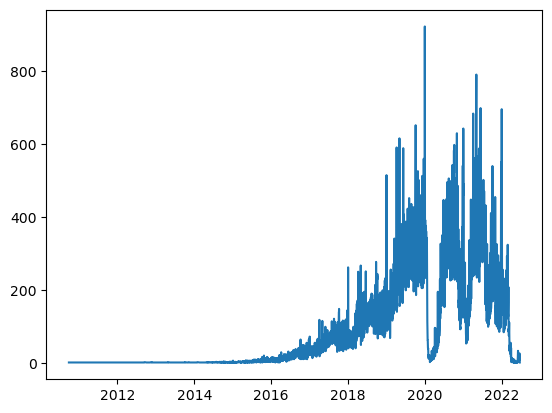

In [28]:
fig,ax = plt.subplots()
ax.plot(review['date'].groupby(review['date']).count())

{'whiskers': [<matplotlib.lines.Line2D at 0x20187329b20>,
 'caps': [<matplotlib.lines.Line2D at 0x201e4412100>,
 'boxes': [<matplotlib.lines.Line2D at 0x20187329850>],
 'medians': [<matplotlib.lines.Line2D at 0x201e44126a0>],
 'fliers': [],
 'means': []}

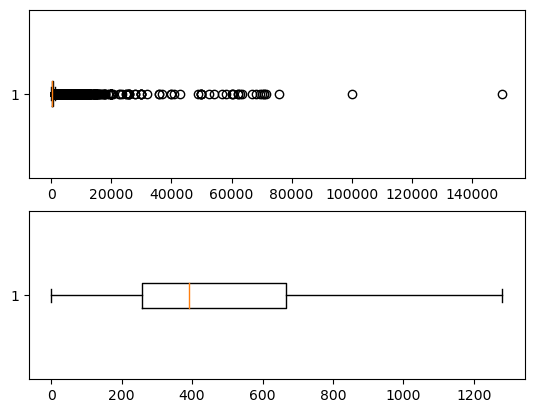

In [82]:
fig, axs = plt.subplots(2,1)
plt.title = '房价分布'
axs[0].boxplot(listings['price'],vert=False)
axs[1].boxplot(listings['price'],vert=False,showfliers=False)

(array([1.0800e+02, 1.0000e+00, 5.8000e+01, 8.0000e+00, 4.0000e+00,
        2.5000e+02, 1.5700e+02, 5.9900e+02, 1.3060e+03, 1.3789e+04]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

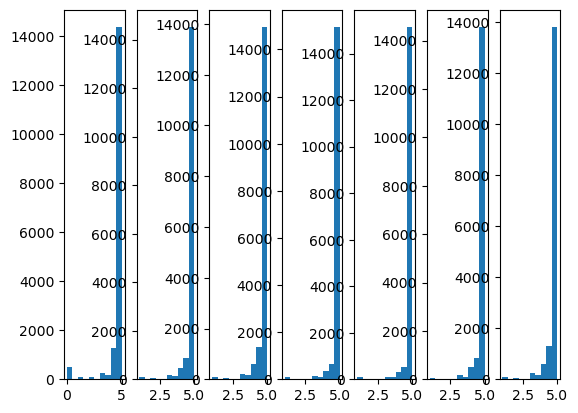

In [85]:
fig, axs = plt.subplots(1,7)
axs[0].hist(listings['review_scores_rating'])
axs[1].hist(listings['review_scores_accuracy'])
axs[2].hist(listings['review_scores_cleanliness'])
axs[3].hist(listings['review_scores_checkin'])
axs[4].hist(listings['review_scores_communication'])
axs[5].hist(listings['review_scores_location'])
axs[6].hist(listings['review_scores_value'])

Step ？：变量间关系

<AxesSubplot:>

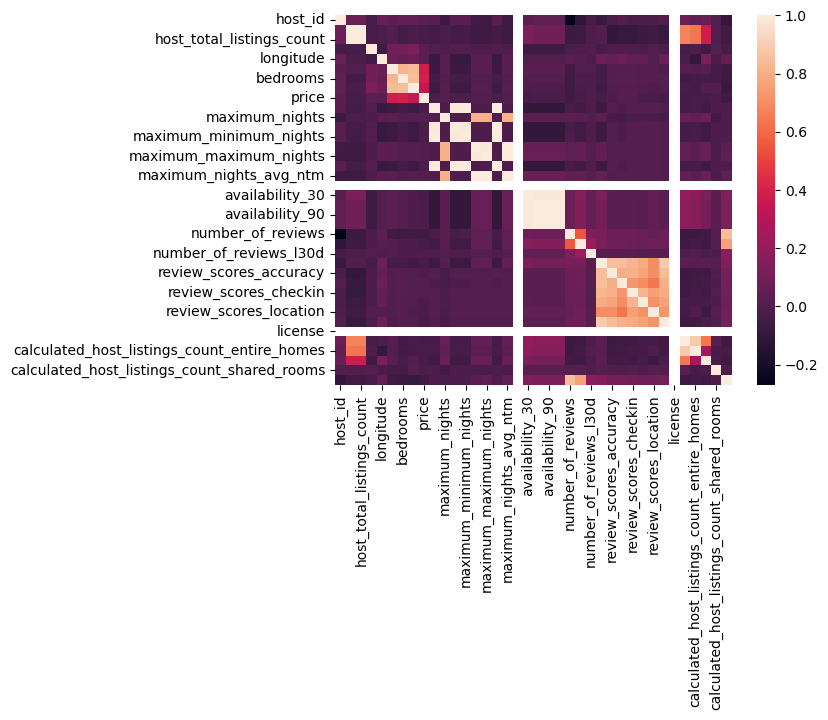

In [29]:
corr_matrix = listings.corr().round(2)
sb.heatmap(corr_matrix)

Step ？：文字数据

In [30]:
# Word cloud 图像生成公式
def wordcloud(comment_column):
    comments = comment_column.astype('string')
    full_txt = " ".join(comment 
                    for comment in comments 
                    if not(pd.isnull(comment)) == True)
    word_list = jieba.cut(full_txt)
    final = " ".join(word_list)
    font = r'C:\Windows\Fonts\simhei.ttf'
    stopwords = set(STOPWORDS)
    stopwords.update(["很", "的", "也", "好的", "都很",'非常好','去','是','真的','br',
                      '是在','Airbnb','非常棒','特别好','特别','小姐姐','真的是','挺好',
                      '好','都','有','来','时候','就在','非常','因为','不是','我','上海',
                      '在','Shanghai','b','号线','左右','可','note','更多','让您','为您',
                      '很多','如果','你','您','Website hidden','希望','能','这里','为',
                      '过','thing','Guest access'])
    wordcloud = WordCloud(stopwords=stopwords,font_path = font,
                          width=1600,height=900,margin=2).generate(final)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

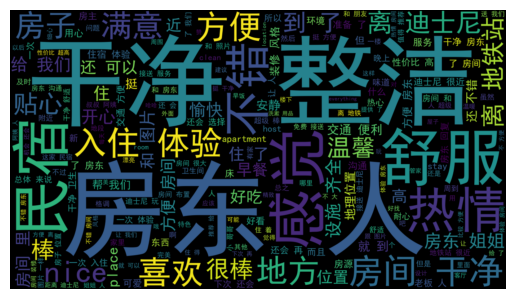

In [31]:
wordcloud(review['comments'])

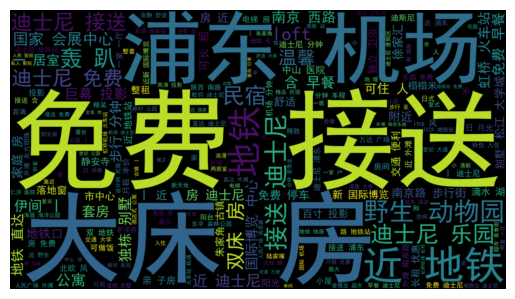

In [32]:
wordcloud(listings['name'])

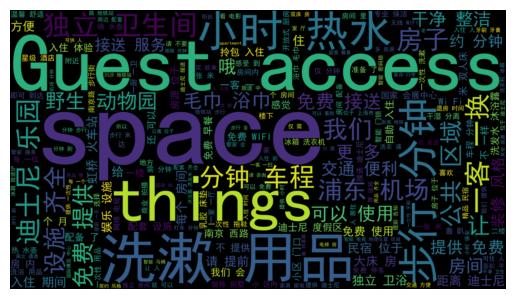

In [33]:
wordcloud(listings['description'])

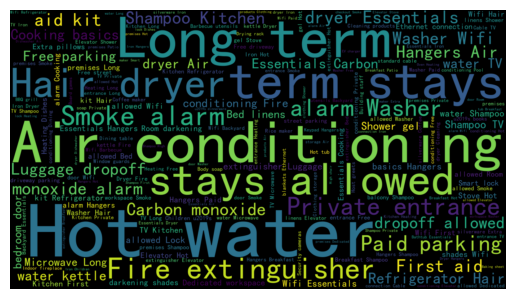

In [34]:
wordcloud(listings['amenities'])

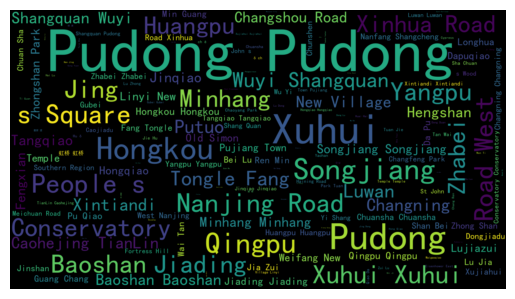

In [35]:
wordcloud(listings['host_neighbourhood'])

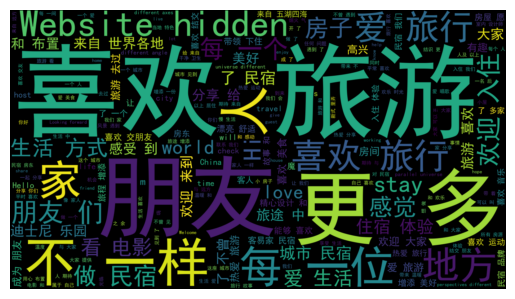

In [36]:
wordcloud(listings['host_about'])

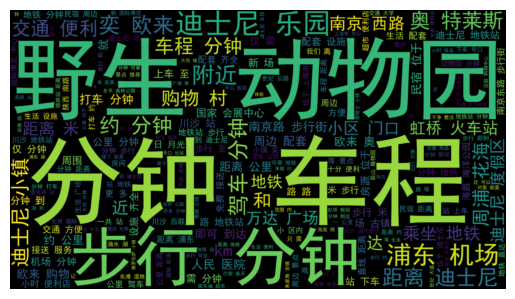

In [37]:
wordcloud(listings['neighborhood_overview'])